In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

In [45]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [46]:
diabetes_data.shape

(768, 9)

In [47]:
diabetes_data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [48]:
# Compute skewness and kurtosis for each column in the dataset
for column in diabetes_data.columns:
    if diabetes_data[column].dtype != 'object':  # Exclude non-numeric columns
        skewness = diabetes_data[column].skew()
        kurt = diabetes_data[column].kurtosis()
        print(f"Skewness of {column}: {skewness}")
        print(f"Kurtosis of {column}: {kurt}")

Skewness of Pregnancies: 0.9016739791518588
Kurtosis of Pregnancies: 0.15921977754746486
Skewness of Glucose: 0.17375350179188992
Kurtosis of Glucose: 0.6407798203735053
Skewness of BloodPressure: -1.8436079833551302
Kurtosis of BloodPressure: 5.180156560082496
Skewness of SkinThickness: 0.10937249648187608
Kurtosis of SkinThickness: -0.520071866153013
Skewness of Insulin: 2.272250858431574
Kurtosis of Insulin: 7.2142595543487715
Skewness of BMI: -0.42898158845356543
Kurtosis of BMI: 3.290442900816981
Skewness of DiabetesPedigreeFunction: 1.919911066307204
Kurtosis of DiabetesPedigreeFunction: 5.5949535279830584
Skewness of Age: 1.1295967011444805
Kurtosis of Age: 0.6431588885398942
Skewness of Outcome: 0.635016643444986
Kurtosis of Outcome: -1.600929755156027


In [49]:
diabetes_data.Outcome.mean()

0.3489583333333333

In [50]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Plot saved to relational_graph.png


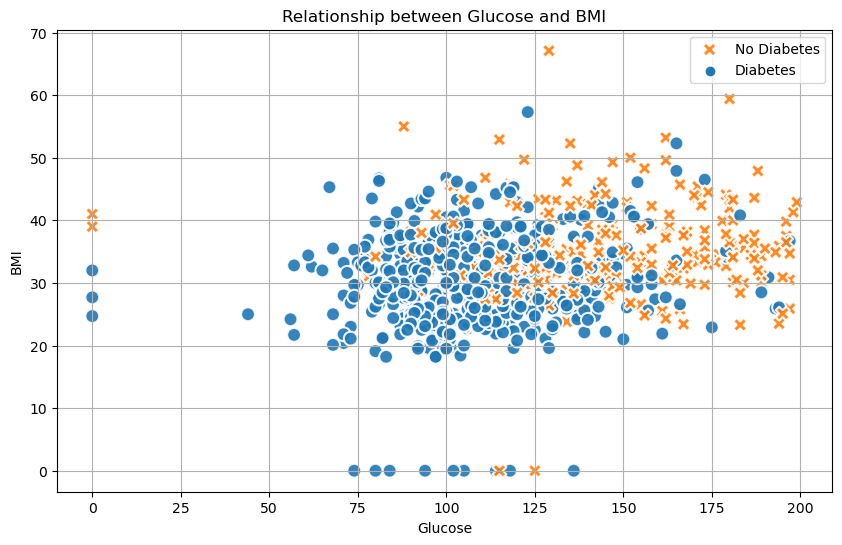

In [51]:
def plot_relational_graph(data, save_path=None):
    """
    Plots a relational scatter graph showing the relationship between 'Glucose' and 'BMI'.
    
    Parameters:
    - data (DataFrame): The pandas DataFrame containing the data to plot.
    - save_path (str, optional): The file path where the plot will be saved. Default is None.
    
    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Glucose', y='BMI', data=data, hue='Outcome', style='Outcome', alpha=0.9, s=100, linewidth=1.5)
    plt.title('Relationship between Glucose and BMI')
    plt.xlabel('Glucose')
    plt.ylabel('BMI')
    plt.legend(labels=['No Diabetes', 'Diabetes'])
    plt.grid(True)
    
    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Plot saved to {save_path}")
    else:
        plt.show()

# Example usage:
# Assuming 'diabetes_data' is your DataFrame
plot_relational_graph(diabetes_data, save_path='relational_graph.png')

In [52]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [53]:
# def plot_categorical_graph(data):
#     """
#     Plots a bar chart to compare the average glucose levels between patients with and without diabetes.
    
#     Parameters:
#     - data (DataFrame): The pandas DataFrame containing the data to plot.
    
#     Returns:
#     None
#     """
#     avg_glucose_by_outcome = data.groupby('Outcome')['Glucose'].mean().reset_index()
#     avg_glucose_by_outcome['Outcome'] = avg_glucose_by_outcome['Outcome'].map({0: 'No Diabetes', 1: 'Diabetes'})
    
#     plt.figure(figsize=(8, 6))
#     sns.barplot(x='Outcome', y='Glucose', data=avg_glucose_by_outcome, palette='pastel')
#     plt.title('Average Glucose Level by Diabetes Outcome')
#     plt.xlabel('Outcome')
#     plt.ylabel('Average Glucose Level')
#     plt.grid(axis='y')
#     plt.show()
    
    
# #     plt.savefig(bbox_inches='tight')
# #     print("Saved")

# plot_categorical_graph(diabetes_data)


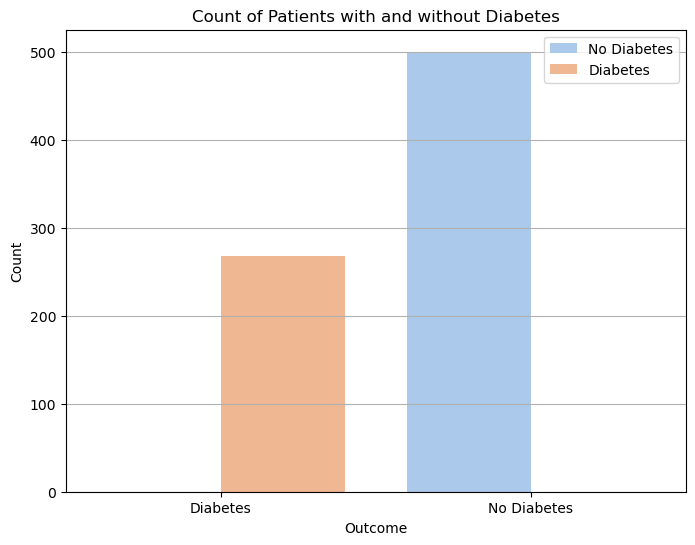

Plot saved to outcome_value_counts_plot.png


<Figure size 640x480 with 0 Axes>

In [54]:

def plot_categorical_graph(data, save_path=None):
    """
    Plots a bar chart to visualize the count of patients with and without diabetes.

    Parameters:
    - data (DataFrame): The pandas DataFrame containing the data to plot.
    - save_path (str, optional): The file path where the plot will be saved. Default is None.

    Returns:
    None
    """
    # Map Outcome values to appropriate labels
    data['Outcome_Label'] = data['Outcome'].map({0: 'No Diabetes', 1: 'Diabetes'})

    plt.figure(figsize=(8, 6))
    sns.countplot(x='Outcome_Label', data=data, palette='pastel', hue='Outcome')
    plt.title('Count of Patients with and without Diabetes')
    plt.xlabel('Outcome')
    plt.ylabel('Count')
    plt.grid(axis='y')

    # Set appropriate legend
    plt.legend(labels=['No Diabetes', 'Diabetes'])

    plt.show()

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Plot saved to {save_path}")

# Example usage:
# Assuming 'diabetes_data' is your DataFrame
plot_categorical_graph(diabetes_data, save_path='outcome_value_counts_plot.png')

In [55]:
# Drop the 'Outcome_Label' column
diabetes_data.drop('Outcome_Label', axis=1, inplace=True)

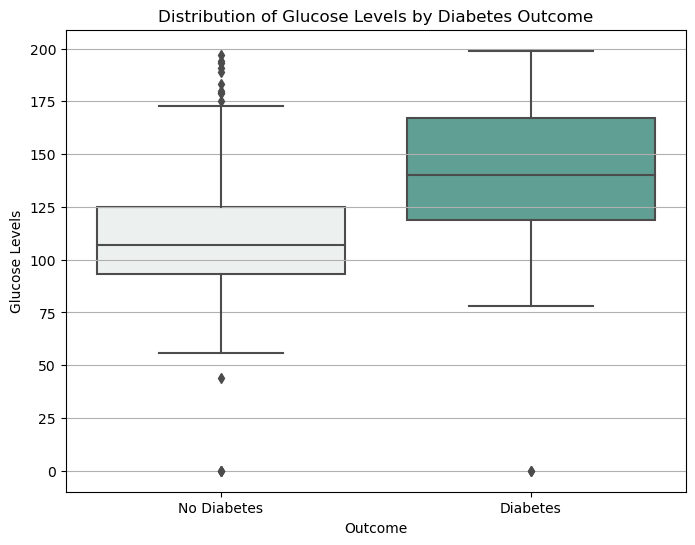

In [56]:
def plot_statistical_graph(data):
    """
    Plots a box plot to show the statistical distribution of 'Glucose' levels across different 'Outcome' categories.
    
    Parameters:
    - data (DataFrame): The pandas DataFrame containing the data to plot.
    
    Returns:
    None
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y='Glucose', data=data, palette='light:#5A9')
    plt.title('Distribution of Glucose Levels by Diabetes Outcome')
    plt.xlabel('Outcome')
    plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
    plt.ylabel('Glucose Levels')
    plt.grid(axis='y')
    plt.show()

plot_statistical_graph(diabetes_data)


In [57]:
moments['skew']
moments['kurtosis']


Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
Name: kurtosis, dtype: float64

In [58]:
# Calculate the major moments for the numerical columns in the dataset
moments = diabetes_data.describe().T  # Transpose for better readability
moments['skew'] = diabetes_data.skew()
moments['kurtosis'] = diabetes_data.kurtosis()

# Display the calculated moments with space before
print("\n\nMajor Moments for the Dataset:\n")
print(moments)

# Calculate and display the correlation matrix
correlation_matrix = diabetes_data.corr()

# Display the correlation matrix with space before
print("\n\nCorrelation Matrix:\n")
print(correlation_matrix)




Major Moments for the Dataset:

                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max      skew  kurtosis  
Pregnancies                 3.0000    6.00000   17.00  0.901674  0.159220  
Glucose                   117.0000  140.250

In [59]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Plot saved to correlation_heatmap.png


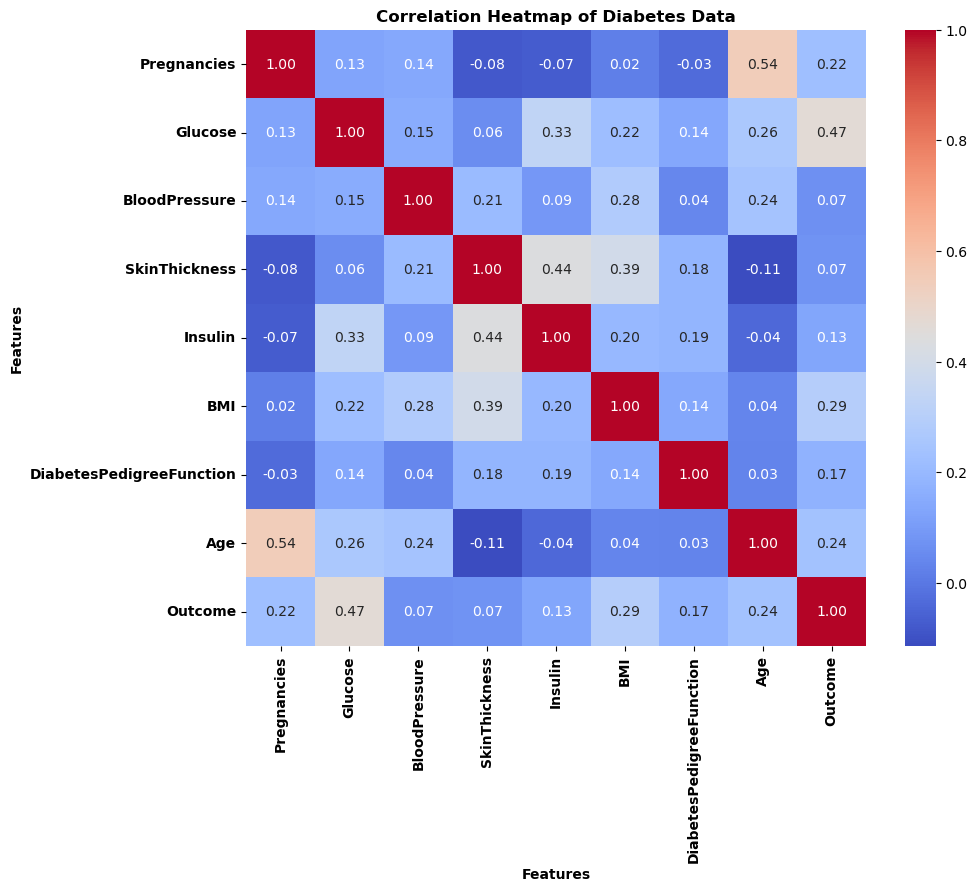

In [60]:
def plot_correlation_heatmap(data, save_path=None):
    """
    Plots a heatmap of the correlation matrix for the given DataFrame.

    Parameters:
    - data (DataFrame): The input DataFrame containing numerical data.
    - save_path (str, optional): The file path where the plot will be saved. Default is None.

    Returns:
    - None: Displays the heatmap plot.
    """
    # Calculate correlation matrix
    correlation_matrix = data.corr()

    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

    # Add labels and title with bold font
    plt.title('Correlation Heatmap of Diabetes Data', fontweight='bold')
    plt.xlabel('Features', fontweight='bold')
    plt.ylabel('Features', fontweight='bold')

    # Adjust tick size and make them bold
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Plot saved to {save_path}")
    else:
        plt.show()

# Example usage:
# Assuming 'diabetes_data' is your DataFrame
plot_correlation_heatmap(diabetes_data, save_path='correlation_heatmap.png')

In [61]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [62]:
# def determine_optimal_clusters(data, k_range):
#     """
#     Determines the optimal number of clusters using the elbow method and silhouette score.
    
#     Parameters:
#     - data (pd.DataFrame): The dataset for clustering, excluding the target variable.
#     - k_range (range): The range of k values to test.
    
#     Returns:
#     - inertia (list): The list of inertia values for each k in k_range.
#     - silhouette_scores (list): The list of silhouette scores for each k in k_range.
#     """
#     features = data.drop('Outcome', axis=1)
#     scaler = StandardScaler()
#     features_scaled = scaler.fit_transform(features)
    
#     inertia = []
#     silhouette_scores = []
#     for k in k_range:
#         kmeans = KMeans(n_clusters=k, random_state=42)
#         kmeans.fit(features_scaled)
#         inertia.append(kmeans.inertia_)
#         silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))
    
#     return inertia, silhouette_scores

# # Determine the optimal number of clusters
# k_range = range(2, 11)
# inertia, silhouette_scores = determine_optimal_clusters(diabetes_data, k_range)

# # Plotting the Elbow method and Silhouette Scores
# plt.figure(figsize=(18, 5))

# # Elbow Method Plot
# plt.subplot(1, 2, 1)
# plt.plot(k_range, inertia, '-o')
# plt.title('Elbow Method For Optimal k')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')

# # Silhouette Score Plot
# plt.subplot(1, 2, 2)
# plt.plot(k_range, silhouette_scores, '-o', color='r')
# plt.title('Silhouette Score For Optimal k')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette Score')

# plt.tight_layout()
# plt.show()


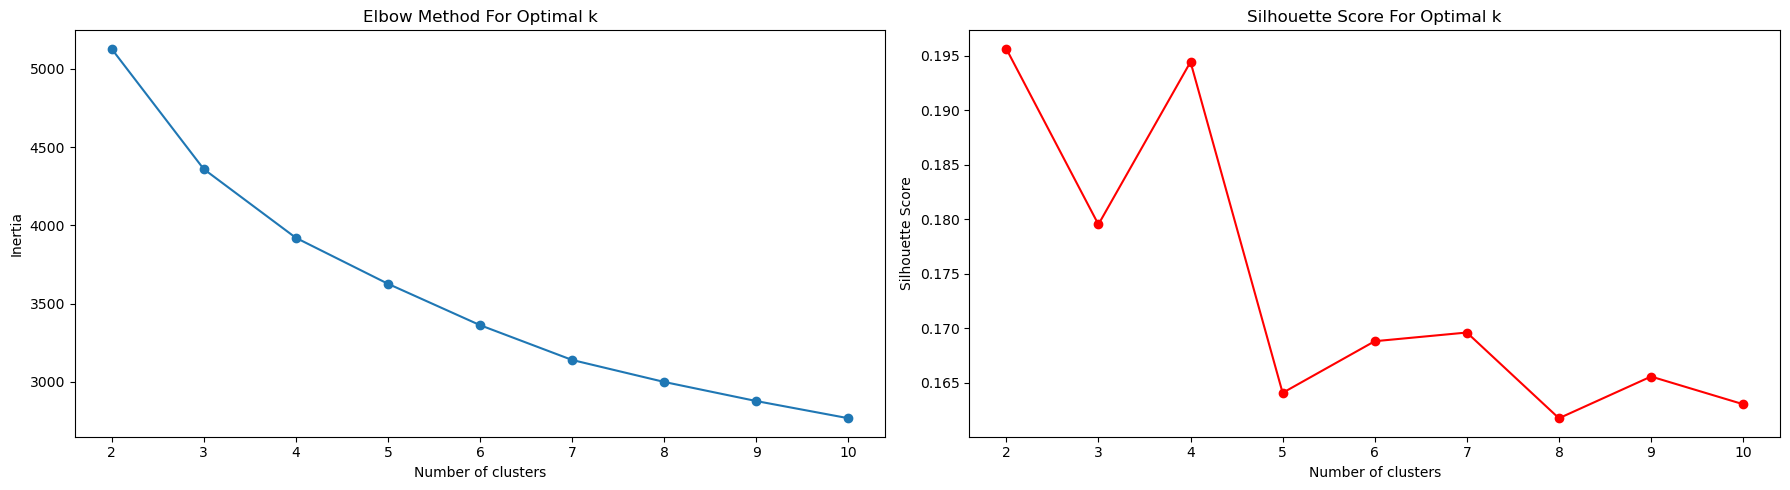

In [63]:
def determine_optimal_clusters(data, k_range):
    """
    Determines the optimal number of clusters using the elbow method and silhouette score.
    
    Parameters:
    - data (pd.DataFrame): The dataset for clustering, excluding the target variable.
    - k_range (range): The range of k values to test.
    
    Returns:
    - inertia (list): The list of inertia values for each k in k_range.
    - silhouette_scores (list): The list of silhouette scores for each k in k_range.
    """
    # Drop non-numeric columns
    features = data.drop(['Outcome'], axis=1)
    
    # Standardize features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    inertia = []
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(features_scaled)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))
    
    return inertia, silhouette_scores

# Determine the optimal number of clusters
k_range = range(2, 11)
inertia, silhouette_scores = determine_optimal_clusters(diabetes_data, k_range)

# Plotting the Elbow method and Silhouette Scores
plt.figure(figsize=(18, 5))

# Elbow Method Plot
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, '-o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, '-o', color='r')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [64]:
# diabetes_data

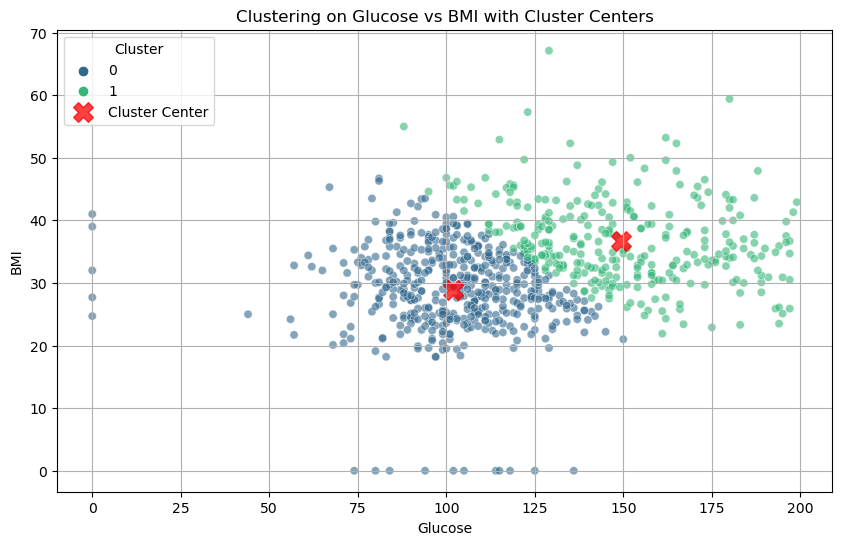

In [65]:
def perform_kmeans_clustering(data, n_clusters):
    """
    Performs K-Means clustering on the given data.
    
    Parameters:
    - data (pd.DataFrame): The dataset for clustering.
    - n_clusters (int): The number of clusters to form.
    
    Returns:
    - clusters (numpy.ndarray): The cluster labels for each data point.
    - centers_original_space (numpy.ndarray): The cluster centers in the original feature space.
    """
    # Extract features for clustering
    features = data[['Glucose', 'BMI']]
    
    # Scale the features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    # Initialize and fit KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_scaled)
    
    # Get cluster labels and cluster centers
    clusters = kmeans.labels_
    centers_original_space = scaler.inverse_transform(kmeans.cluster_centers_)
    
    return clusters, centers_original_space

# Perform K-Means clustering with the optimal number of clusters
optimal_k = 2  # Change this to the optimal number of clusters you determined
clusters, centers_original_space = perform_kmeans_clustering(diabetes_data, n_clusters=optimal_k)

# Adding cluster assignments to the original dataset for visualization
diabetes_data['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Cluster', data=diabetes_data, palette='viridis', alpha=0.6, legend='full')
plt.scatter(centers_original_space[:, 0], centers_original_space[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Cluster Center')
plt.title('Clustering on Glucose vs BMI with Cluster Centers')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

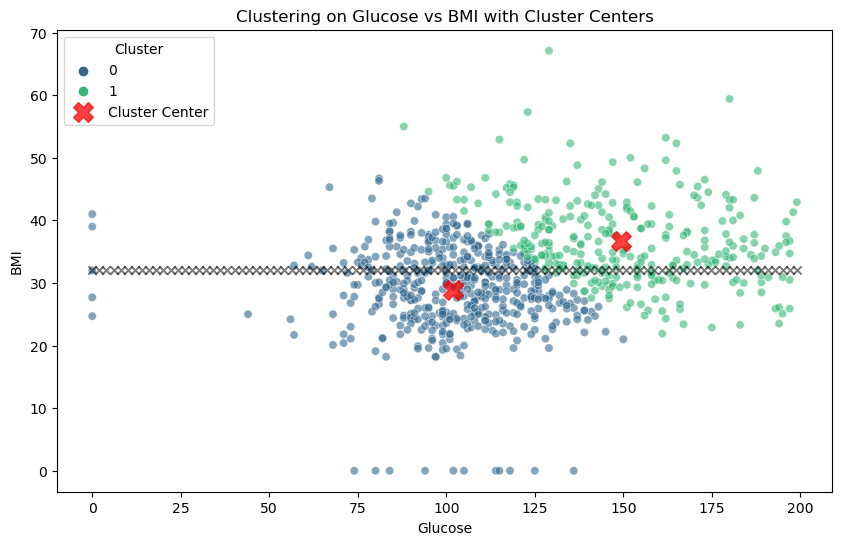

In [66]:
def predict_with_cluster_groups(X, kmeans_model, num_samples=100):
    """
    Generates predicted points and assigns them to appropriate clusters based on the trained KMeans model.
    
    Parameters:
    - X (array-like): The independent variable.
    - kmeans_model (KMeans): The trained KMeans model.
    - num_samples (int): Number of samples to generate for prediction.
    
    Returns:
    - predicted_clusters (array-like): The cluster assignments for the predicted points.
    """
    # Generate predicted points
    x_pred = np.linspace(X.min(), X.max(), num_samples).reshape(-1, 1)
    # Dummy BMI values at mean BMI
    bmi_mean = np.mean(diabetes_data['BMI'])
    bmi_dummy = np.full_like(x_pred, bmi_mean)
    # Concatenate Glucose and dummy BMI
    X_pred = np.concatenate((x_pred, bmi_dummy), axis=1)
    # Predict cluster assignments for the generated points
    predicted_clusters = kmeans_model.predict(X_pred)
    
    return x_pred, predicted_clusters

# Load your dataset (assuming it's named diabetes_data)

# Perform K-Means clustering with the optimal number of clusters
optimal_k = 2  # Change this to the optimal number of clusters you determined
clusters, centers_original_space = perform_kmeans_clustering(diabetes_data, n_clusters=optimal_k)

# Adding cluster assignments to the original dataset for visualization
diabetes_data['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Cluster', data=diabetes_data, palette='viridis', alpha=0.6, legend='full')
plt.scatter(centers_original_space[:, 0], centers_original_space[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Cluster Center')
plt.title('Clustering on Glucose vs BMI with Cluster Centers')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend(title='Cluster')

# Fit KMeans model with original data
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_model.fit(diabetes_data[['Glucose', 'BMI']])

# Perform clustering prediction and plot the predicted points with assigned clusters
x_pred, predicted_clusters = predict_with_cluster_groups(diabetes_data['Glucose'].values.reshape(-1, 1), kmeans_model=kmeans_model)
for cluster in range(optimal_k):
    plt.scatter(x_pred[predicted_clusters == cluster], [diabetes_data['BMI'].mean()] * np.sum(predicted_clusters == cluster), marker='x', color='black', alpha=0.5, label=f'Predicted Cluster {cluster}')

plt.show()

In [67]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.103003
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.726776
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.161658
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,0.174314
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,0.294561
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.480130
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.106154
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.188347
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.436454
Cluster,0.103003,0.726776,0.161658,0.174314,0.294561,0.480130,0.106154,0.188347,0.436454,1.000000


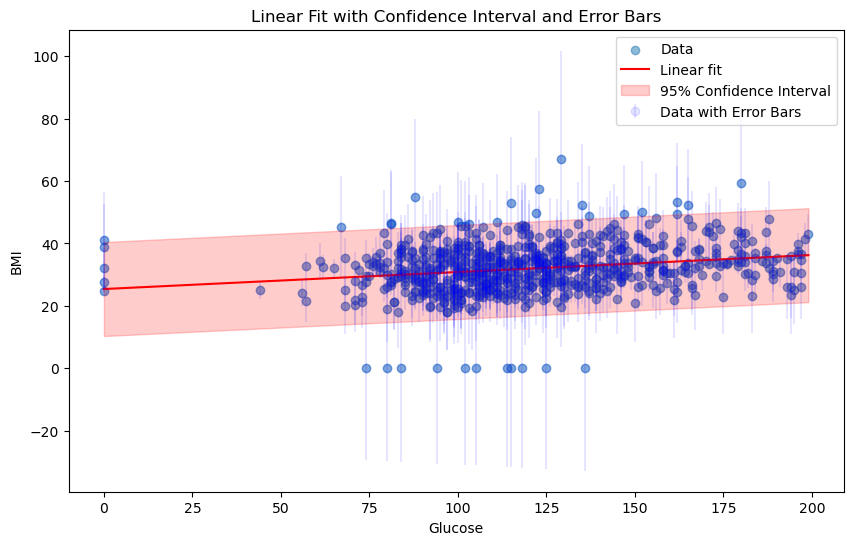

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_linear_fit_with_confidence_and_error_bars(X, y):
    """
    Fits a linear model to X and y, then plots the data, the fitted line,
    the confidence interval around the fitted line, and error bars representing
    the residuals of the fit.
    """
    # Fit the model
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
    
    # Make predictions
    x_pred = np.linspace(X.min(), X.max(), 100)
    y_pred = intercept + slope * x_pred
    
    # Calculate the residuals
    residuals = y - (slope*X + intercept)
    
    # Calculate the 95% confidence interval for the residuals
    ci = 1.96 * np.std(residuals)  # 95% confidence interval
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, label='Data', alpha=0.5)
    plt.plot(x_pred, y_pred, label='Linear fit', color='red')
    plt.fill_between(x_pred, y_pred - ci, y_pred + ci, color='red', alpha=0.2, label='95% Confidence Interval')
    plt.errorbar(X, y, yerr=np.abs(residuals), fmt='o', color='blue', alpha=0.1, label='Data with Error Bars')
    plt.xlabel('Glucose')
    plt.ylabel('BMI')
    plt.title('Linear Fit with Confidence Interval and Error Bars')
    plt.legend()
    plt.show()

# Convert to numpy arrays for compatibility
X = diabetes_data['Glucose'].to_numpy()
y = diabetes_data['BMI'].to_numpy()

# Perform the corrected fitting and plotting operation
plot_linear_fit_with_confidence_and_error_bars(X, y)


In [69]:
# def plot_linear_fit_with_confidence(X, y):
#     """
#     Fits a linear model to X and y, then plots the data, the fitted line,
#     and the confidence interval around the fitted line.
#     """
#     # Fit the model
#     slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
    
#     # Make predictions
#     x_pred = np.linspace(X.min(), X.max(), 100)
#     y_pred = intercept + slope * x_pred
    
#     # Calculate the confidence interval
#     syx = np.sqrt(np.sum((y - (slope*X + intercept))**2) / (len(y) - 2))
#     x_mean = np.mean(X)
#     conf_margin = syx * np.sqrt(1/len(X) + (x_pred - x_mean)**2 / np.sum((X - x_mean)**2))
    
#     # Plot
#     plt.figure(figsize=(10, 6))
#     plt.scatter(X, y, label='Data', alpha=0.5)
#     plt.plot(x_pred, y_pred, label='Linear fit', color='red')
#     plt.fill_between(x_pred, y_pred - conf_margin, y_pred + conf_margin, color='red', alpha=0.2, label='95% Confidence Interval')
#     plt.errorbar(X, y, yerr=np.ones_like(y)*2*conf_margin.mean(), fmt='none', ecolor='gray', alpha=0.5)
#     plt.xlabel('Glucose')
#     plt.ylabel('BMI')
#     plt.title('Linear Fit with Confidence Interval')
#     plt.legend()
#     plt.show()

# # Convert to numpy arrays for compatibility
# X = diabetes_data['Glucose'].to_numpy()
# y = diabetes_data['BMI'].to_numpy()

# # Perform the corrected fitting and plotting operation
# plot_linear_fit_with_confidence(X, y)



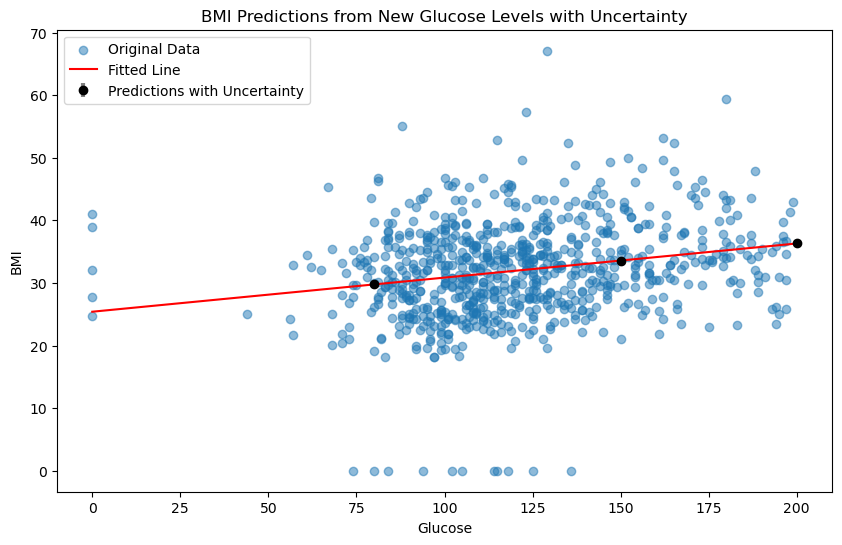

In [70]:
def plot_linear_fit_with_predictions(X, y, new_glucose_levels, alpha=0.1):
    """
    Fits a linear model to X and y, then plots the data, fitted line, predictions for new glucose levels with uncertainties,
    and the confidence intervals around the fitted line.
    
    Parameters:
        X (array-like): The independent variable.
        y (array-like): The dependent variable.
        new_glucose_levels (array-like): New glucose levels for prediction.
        alpha (float): Transparency level of predicted lines.
    """
    # Fit linear model
    slope, intercept, _, _, std_err = stats.linregress(X, y)
    
    # Predict for original data
    x_pred = np.linspace(X.min(), X.max(), 100)
    y_pred = intercept + slope * x_pred
    
    # Predict for new glucose levels
    new_bmi_predictions = intercept + slope * new_glucose_levels
    
    # Calculate confidence margin for new predictions
    new_conf_margin = std_err * np.sqrt(1/len(X) + (new_glucose_levels - np.mean(X))**2 / np.sum((X - np.mean(X))**2))
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.5, label='Original Data')
    plt.plot(x_pred, y_pred, color='red', label='Fitted Line')
    plt.errorbar(new_glucose_levels, new_bmi_predictions, yerr=new_conf_margin, fmt='o', color='black', ecolor='gray', elinewidth=3, capsize=0, label='Predictions with Uncertainty')
    plt.xlabel('Glucose')
    plt.ylabel('BMI')
    plt.title('BMI Predictions from New Glucose Levels with Uncertainty')
    plt.legend()
    plt.show()

# Convert to numpy arrays for compatibility
X = diabetes_data['Glucose'].to_numpy()
y = diabetes_data['BMI'].to_numpy()

# New glucose levels for prediction
new_glucose_levels = np.array([80, 150, 200])

# Perform the corrected fitting and plotting operation
plot_linear_fit_with_predictions(X, y, new_glucose_levels)

In [71]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import stats

# def linear_regression_with_uncertainty(X, y, num_samples=100):
#     """
#     Fits a linear regression model to X and y and makes predictions
#     with associated uncertainties.
    
#     Parameters:
#     - X (array-like): The independent variable.
#     - y (array-like): The dependent variable.
#     - num_samples (int): Number of samples to draw for uncertainty estimation.
    
#     Returns:
#     - y_pred_mean (array-like): Mean of the predicted values.
#     - y_pred_std (array-like): Standard deviation of the predicted values.
#     """
#     # Fit the model
#     slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
    
#     # Make predictions
#     x_pred = np.linspace(X.min(), X.max(), 100)
#     y_pred = intercept + slope * x_pred
    
#     # Calculate the residuals
#     residuals = y - (slope*X + intercept)
    
#     # Estimate uncertainty by drawing samples from the residuals
#     y_pred_samples = np.outer(np.ones(num_samples), y_pred) + np.random.choice(residuals, size=(num_samples, len(y_pred)))
    
#     # Calculate mean and standard deviation of the predicted values
#     y_pred_mean = np.mean(y_pred_samples, axis=0)
#     y_pred_std = np.std(y_pred_samples, axis=0)
    
#     return y_pred_mean, y_pred_std

# # Convert to numpy arrays for compatibility
# X = diabetes_data['Glucose'].to_numpy()
# y = diabetes_data['BMI'].to_numpy()

# # Make predictions with associated uncertainties
# y_pred_mean, y_pred_std = linear_regression_with_uncertainty(X, y)

# # Plot the data, the fitted line, and the uncertainty
# plt.figure(figsize=(10, 6))
# plt.scatter(X, y, label='Data', alpha=0.5)
# plt.plot(np.linspace(X.min(), X.max(), 100), y_pred_mean, label='Linear fit', color='red')
# plt.fill_between(np.linspace(X.min(), X.max(), 100), y_pred_mean - y_pred_std, y_pred_mean + y_pred_std, color='red', alpha=0.2, label='Uncertainty')
# plt.xlabel('Glucose')
# plt.ylabel('BMI')
# plt.title('Linear Fit with Uncertainty')
# plt.legend()
# plt.show()


In [72]:
# def plot_linear_fit_with_uncertainties(X, y, num_samples=100):
#     """
#     Fits a linear model to X and y, then plots the data, multiple fitted lines with uncertainties,
#     and the confidence intervals around the fitted lines.
    
#     Parameters:
#         X (array-like): The independent variable.
#         y (array-like): The dependent variable.
#         num_samples (int): Number of bootstrap samples to generate.
#     """
#     # Initialize arrays to store slope and intercept samples
#     slope_samples = np.zeros(num_samples)
#     intercept_samples = np.zeros(num_samples)
    
#     # Generate bootstrap samples and fit linear models
#     for i in range(num_samples):
#         bootstrap_indices = np.random.choice(len(X), size=len(X), replace=True)
#         X_bootstrap = X[bootstrap_indices]
#         y_bootstrap = y[bootstrap_indices]
#         slope, intercept, _, _, _ = stats.linregress(X_bootstrap, y_bootstrap)
#         slope_samples[i] = slope
#         intercept_samples[i] = intercept
    
#     # Calculate percentiles for confidence intervals
#     slope_lower, slope_upper = np.percentile(slope_samples, [2.5, 97.5])
#     intercept_lower, intercept_upper = np.percentile(intercept_samples, [2.5, 97.5])
    
#     # Make predictions for the original data
#     x_pred = np.linspace(X.min(), X.max(), 100)
#     y_pred_mean = intercept_samples.mean() + slope_samples.mean() * x_pred
    
#     # Plot original data
#     plt.figure(figsize=(10, 6))
#     plt.scatter(X, y, label='Data', alpha=0.5)
    
#     # Plot multiple fitted lines
#     for i in range(num_samples):
#         y_pred = intercept_samples[i] + slope_samples[i] * x_pred
#         plt.plot(x_pred, y_pred, color='red', alpha=0.1)
    
#     # Plot mean prediction with confidence interval
#     plt.plot(x_pred, y_pred_mean, label='Mean Prediction', color='black')
#     plt.fill_between(x_pred, y_pred_mean - (slope_upper * x_pred + intercept_lower), 
#                      y_pred_mean + (slope_upper * x_pred + intercept_upper), 
#                      color='blue', alpha=0.2, label='95% Confidence Interval')
    
#     # Add legend and labels
#     plt.xlabel('Glucose')
#     plt.ylabel('BMI')
#     plt.title('Linear Fit with Uncertainties')
#     plt.legend()
#     plt.show()

# # Convert to numpy arrays for compatibility
# X = diabetes_data['Glucose'].to_numpy()
# y = diabetes_data['BMI'].to_numpy()

# # Perform the corrected fitting and plotting operation
# plot_linear_fit_with_uncertainties(X, y)